In [ ]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.3, random_state=42)

# Train a RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
X_train.shape
y_train.value_counts()

In [ ]:
# Explain model predictions using SHAP
###explainer = shap.Explainer(model, X_train, check_additivity=False)
###shap_values_train = explainer(X_train)
###shap_values_test = explainer(X_test)

# Use TreeExplainer for RandomForest
explainer = shap.Explainer(model)
# Get SHAP values for train and test
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)
shap_values_train
shap.plots.bar(shap_values_train)


In [ ]:
shap_values_train[:, :,1].shape
print(shap_values_train.shape)
print(shap_values_test[...,0].shape)
print(shap_values_test[...,1].shape)

shap_values_test[0]
pd.DataFrame(shap_values_test[:,:,1])

In [ ]:
pd.DataFrame(shap_values_test[:,:,0])

In [ ]:
shap_values_test[:,:,1].mean(axis=0)
#shap.plots.bar(shap_values_test)
import xgboost

import shap

# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap_values

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# Compute mean absolute SHAP values for train and test
feature_importance_train = np.abs(shap_values_train.values).mean(axis=0)
feature_importance_test = np.abs(shap_values_test.values).mean(axis=0)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Train Importance': feature_importance_train,
    'Test Importance': feature_importance_test
})

# Sort by Train Importance
feature_importance_df = feature_importance_df.sort_values(by='Train Importance', ascending=False)


In [ ]:
import matplotlib.pyplot as plt

# Plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(feature_importance_df["Train Importance"], feature_importance_df["Test Importance"], alpha=0.7)
plt.plot([0, max(feature_importance_df["Train Importance"])], [0, max(feature_importance_df["Train Importance"])], linestyle="--", color="red", label="y=x")
plt.xlabel("Train Feature Importance (SHAP)")
plt.ylabel("Test Feature Importance (SHAP)")
plt.title("Feature Importance Comparison: Train vs Test")
plt.legend()
plt.show()


In [ ]:
## K-Nearest Classifier


In [1]:
import sklearn
import shap
X, y = shap.datasets.adult()
X["Occupation"] *= 1000  # to show the impact of feature scale on KNN predictions
X_display, y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

def f(x):
    return knn.predict_proba(x)[:, 1]

med = X_train.median().values.reshape((1, X_train.shape[1]))
med

f(med)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.2])

In [3]:
explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000, :])
shap_values

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, bu

.values =
array([[-0.02894737,  0.        ,  0.        , ..., -0.07105263,
         0.        ,  0.        ],
       [ 0.01212121,  0.03636364,  0.23030303, ...,  0.        ,
         0.12121212,  0.        ],
       [-0.18      ,  0.        ,  0.        , ...,  0.        ,
        -0.06      ,  0.        ],
       ...,
       [ 0.02444444, -0.17555556, -0.05111111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31636364,  0.        ,  0.02909091, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00181818,  0.        , -0.01090909, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
 

In [7]:
shap_values

.values =
array([[-0.02894737,  0.        ,  0.        , ..., -0.07105263,
         0.        ,  0.        ],
       [ 0.01212121,  0.03636364,  0.23030303, ...,  0.        ,
         0.12121212,  0.        ],
       [-0.18      ,  0.        ,  0.        , ...,  0.        ,
        -0.06      ,  0.        ],
       ...,
       [ 0.02444444, -0.17555556, -0.05111111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31636364,  0.        ,  0.02909091, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00181818,  0.        , -0.01090909, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
 

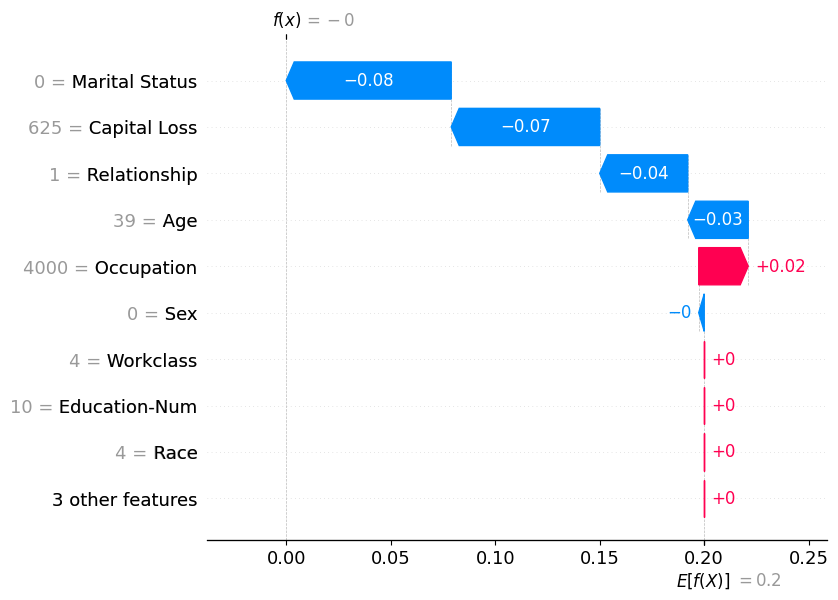

In [4]:
shap.plots.waterfall(shap_values[0])


In [5]:
med

array([[3.7e+01, 4.0e+00, 1.0e+01, 2.0e+00, 7.0e+03, 3.0e+00, 4.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 4.0e+01, 3.9e+01]])